In [51]:
import numpy as np
import tensorflow as tf
import matplotlib as plt
from tensorflow.keras import datasets,layers, models
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.datasets import mnist
from sklearn.datasets import load_iris
from keras.utils import to_categorical
from keras.metrics import categorical_crossentropy
from sklearn import metrics
import matplotlib.pyplot as plt

In [52]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [53]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_test.shape

(10000, 1)

# **lenet 5 arch**

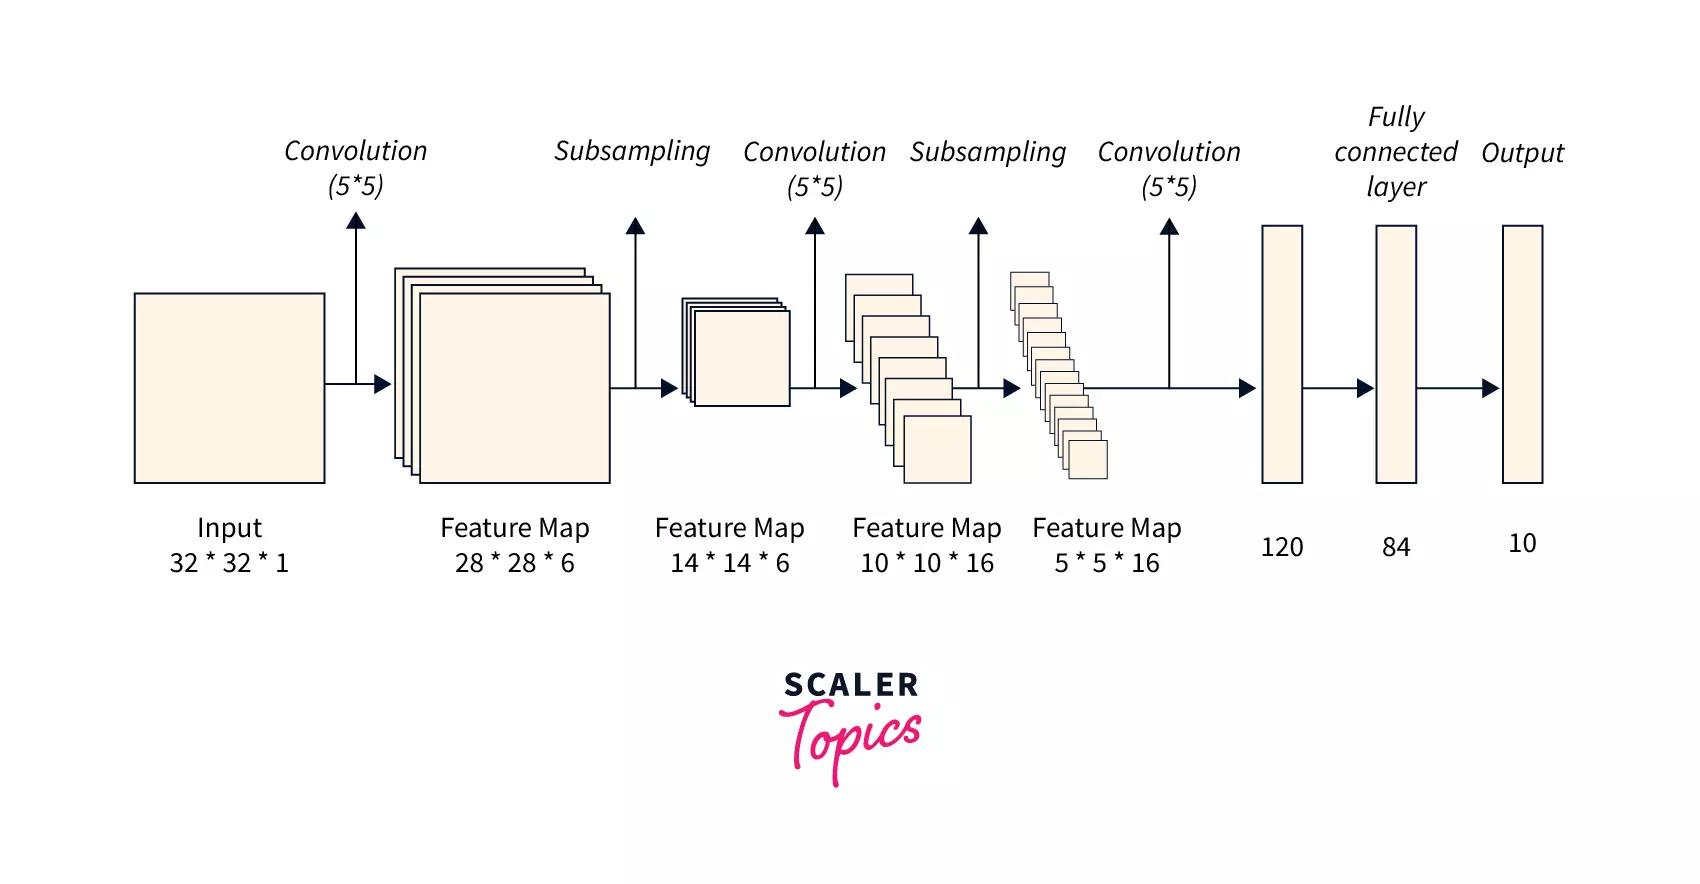

In [54]:
model = models.Sequential()
model.add(layers.Conv2D(6, (5, 5), activation='tanh', input_shape=(32, 32, 3)))
model.add(layers.AvgPool2D((2, 2) , strides=2))

model.add(layers.Conv2D(16, (5, 5), activation='tanh'))
model.add(layers.AvgPool2D((2, 2) , strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(120, activation='tanh'))
model.add(layers.Dense(84, activation = 'tanh'))
model.add(layers.Dense(10, activation = 'softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_11            │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_12            │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3200 - loss: 1.8900
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4437 - loss: 1.5724
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4925 - loss: 1.4320
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5220 - loss: 1.3451
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5470 - loss: 1.2747
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5724 - loss: 1.2087
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5883 - loss: 1.1588
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6011 - loss: 1.1243
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6143 - loss: 1.0845
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6241 - loss: 1.0476


**confusion matrix**

In [57]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
test_acc


313/313 - 1s - 4ms/step - accuracy: 0.5421 - loss: 1.3144


0.5421000123023987

In [58]:
mnist_predictions = model.predict(x_test)
mnist_predicted_labels = np.argmax(mnist_predictions, axis=1)
mnist_confusion = confusion_matrix(y_test, mnist_predicted_labels)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(70.72222222222221, 0.5, 'True classes')

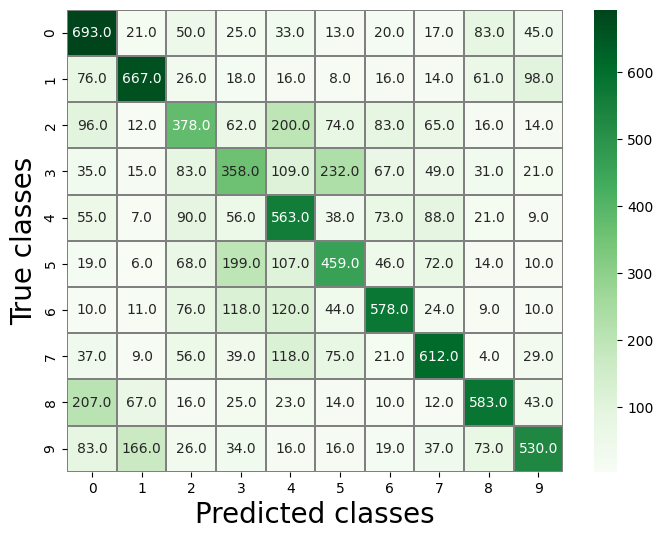

In [59]:
import seaborn as sns 

plt.figure(figsize = (8,6))
sns.heatmap(mnist_confusion, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', 
            fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)

**precision:**
True Positive / (True Positive + False Positive)

In [60]:
Precision = metrics.precision_score(y_test, mnist_predicted_labels, average='weighted')
print(Precision,"of data that is predicted as true was exactly true")

0.5474172696456399 of data that is predicted as true was exactly true


**Recall:** True Positive / (True Positive + False Negative)

In [61]:
recall = metrics.recall_score(y_test, mnist_predicted_labels, average="weighted")
print(recall, "of the actual true data was predicted as true")

0.5421 of the actual true data was predicted as true


**F1 score:** 2 * ((Precision * recall) / (Precision + recall))

In [62]:
F1_score = metrics.f1_score(y_test, mnist_predicted_labels, average="weighted")
F1_score

0.5416005790269872

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test , mnist_predicted_labels))

              precision    recall  f1-score   support

           0       0.53      0.69      0.60      1000
           1       0.68      0.67      0.67      1000
           2       0.43      0.38      0.40      1000
           3       0.38      0.36      0.37      1000
           4       0.43      0.56      0.49      1000
           5       0.47      0.46      0.47      1000
           6       0.62      0.58      0.60      1000
           7       0.62      0.61      0.62      1000
           8       0.65      0.58      0.62      1000
           9       0.66      0.53      0.59      1000

    accuracy                           0.54     10000
   macro avg       0.55      0.54      0.54     10000
weighted avg       0.55      0.54      0.54     10000

